In [19]:
import pandas as pd
#imports pandas library
import re
import nltk
#from nltk we are downloading the dataset containing the stopwords and we're going to remove that from our training dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HARISH
[nltk_data]     NARRENDRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
true = pd.read_csv('true.csv')
# reads the CSV file provided for training and making of the model

In [99]:
true.head()
#this bascially prinst the first five datasets to ensure that the loaded dataset is correct or not and if we want more values then we 
#can execute the following true.head(20) this will print out the first 20 datasets

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [100]:
true.shape
#So in the data set we have four categories title , text , subject , date and hence we will have an 2D array with four columns
#and number of elements basically tells us the number of training sets that we have 

(21417, 4)

In [101]:
fake = pd.read_csv('fake.csv')
fake.shape
#This reads the fake data set provided by us in the form of CSV file and also the shape dentoes that fake sataset also has same 
#categories as true data set

(23481, 4)

In [102]:
true['label'] = 1
fake['label'] = 0
#this basically adds a coulmn to our data sets i.e. an increase in no. of columns by adding a label of 1 to 
#true values and 0 to fake values

In [103]:
# Use the the first 5000 data of true and fake dataset for building the model. .loc function selects the date from the defined
# number of rows and columns. first 5000 rows and all columns in both true and fake news  
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

In [104]:
df = pd.concat(frames)
#concat combines i.e. concantenates the datas provided in the frames variable

In [105]:
df.shape

(10002, 5)

In [106]:
df.tail()
#prints out the last 5 datasets of the training set

,title,text,subject,date,label
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",0
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",0
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",0
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0


In [110]:
X = df. drop('label', axis=1)
y = df['label']

In [111]:
df = df.dropna()
df2 = df.copy()

In [112]:
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### Data Preprocessing

In [113]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#NLTK stands for natural language tool kit and from that we are importing a set of stopwords (ex:and , the , for etc) as 
#they won't carry much meaning and importing of PorterStemmer allows us to find the root word of a given word(Jumping ---> jump)

In [114]:
corpus = []
#using a for loop we are iterating over each dataset by forming an array of words and checking for each word is in stopwords
#dataset or not if found to be in stopwords dataset then it is removed .... once this process is done we're left with news in 
#the form of list and we then join them using the join function and add to the list called corpus ....these
#above mentioned process are done for every training dataset and are added to our corpus list
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [115]:
# TFidf Vectorizer
#this is the most crucial part of this model .... here each news is converted to a matrix form before being fed into neural network
#or somesort of algorithm that we are going to use and the weight assigned to each word in the corpus depends on the frequency of 
#it's occurrence 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [116]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [117]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Building using Support Vactor Machine Classifier

In [128]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')

In [129]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.999


In [130]:
import matplotlib.pyplot as plt
#A confusion matrix is a measure of how our algorithm is working . it plots a square matrix in which one axis will be the 
#actual values and in the other it will be predicted values , so all diagonal elements represents the successive predictions
#made by our model and non diagonal elements represents how our model predeicted something into what ....

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


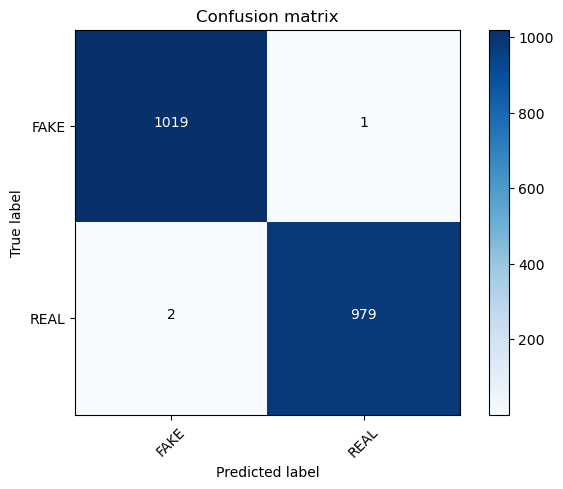

In [131]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Validate on an unseen datapoint

The entire process of preprocessing of data done for a single test case ... it seems to be simple as it is done for a single example

In [132]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [133]:
val = tfidf_v.transform([review]).toarray()

In [134]:
classifier.predict(val)

array([0], dtype=int64)

## Save model and vectorizer

In [135]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

#### Load model and vectorizer to predict the previous datapoint

In [136]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
test_pred = joblib_model.predict(val_pkl)

if test_pred == 0:
    print("Fake News!")
else:
    print("Real News")

Fake News!


So the things on which this model work to identify whether the news is fake or real are
1.check for the source of this news .... it checks for the source from the loaded training dataset
2.check for theauthor of that news ... if in the training set say that author's news were all true then the model is likely to predict that this news is true
3.

TFidf vectorizer:(stands for term frequency inverse document frequency)
It assigns a value for each of the preprocessed training dataset and give that in a matrix form. How it assigns value for each term in preprocessed training dataset ...?
Well , TF - idf ...
Term Frequency: It is the ratio of number of times a particular word appears in the dataset to the total number of words in the dataset.
Inverse Document Frequency: it is the logarithmic value of ratio of number of training set in the entire training set which has that word to the number of training sets in the entire training set.
So the value that is being assigned to the is the product of these two values ... bascially it is just a measure of how important that particular word is....


Things that can be changed:
While using a passive aggressive classifier....we should set aside a set of data called validation set such that after each training sert the model now has to run over the validation set and hence has to make a balance over the prediction done for this training dataset and for the validation dataset i.e. while it encounters a new training set , and suppose it's prediction goes wrong... then it turns aggressive and will make changes in the parameters i.e. weights ... and now it has to ensure that the new set of weights should not give a wrong prediction for the validation dataset ... so this updation of training dataset while it turn aggressive has to be somewhat suitable for the validation set as well.... this type will ensure that if the model encounters the same news again it's prediction will be accurate 
